In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier


In [14]:
df = pd.read_csv('survey lung cancer.csv')  # đổi tên nếu bạn tải về khác

print(df.head())
print(df.info())


  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0                    2                      

In [15]:
# Chuyển tất cả cột chữ thành số bằng LabelEncoder
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

print(df.head())


   GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0       1   69        1               2        2              1   
1       1   74        2               1        1              1   
2       0   59        1               1        1              2   
3       1   63        2               2        2              1   
4       0   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  LUNG_CANCER  
0                    2               

In [16]:
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [17]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("🔍 Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


🔍 Random Forest Accuracy: 0.967741935483871
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62



In [18]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

print("🔥 XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))


🔥 XGBoost Accuracy: 0.9838709677419355
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.98      1.00      0.99        60

    accuracy                           0.98        62
   macro avg       0.99      0.75      0.83        62
weighted avg       0.98      0.98      0.98        62



c:\Users\Dell\OneDrive\Pictures\Documents\Code\python\OpenCV\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:26:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


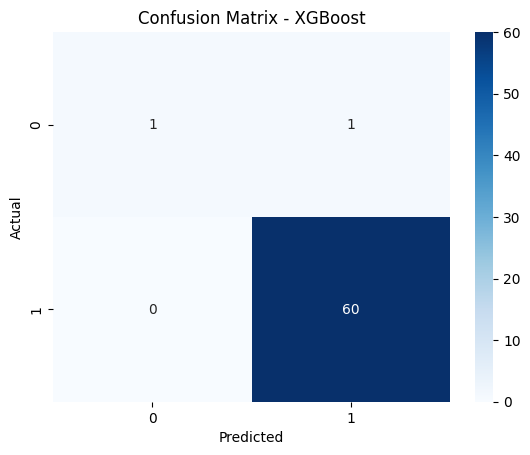

In [19]:
sns.heatmap(confusion_matrix(y_test, xgb_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


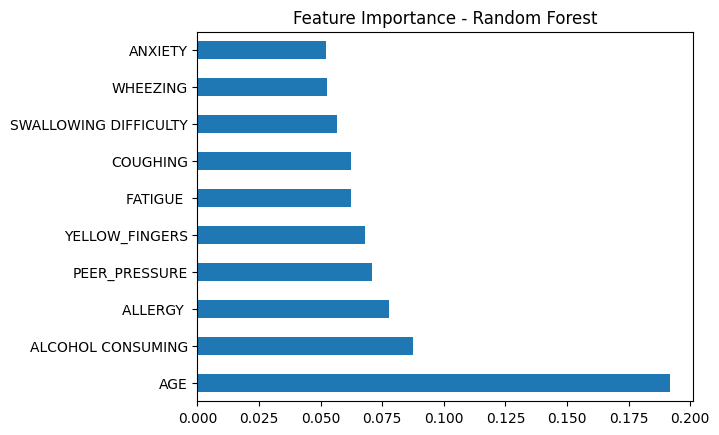

In [20]:
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Feature Importance - Random Forest")
plt.show()


In [21]:
import joblib

# Sau khi huấn luyện model xong
joblib.dump(xgb_model, 'lung_cancer_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [23]:
import joblib
import numpy as np

# Load model và scaler đã huấn luyện
model = joblib.load('lung_cancer_model.pkl')
scaler = joblib.load('scaler.pkl')

print("🔍 Nhập thông tin người dùng:")

# Hàm chuyển đổi input
def convert(value):
    return 1 if value.strip().upper() in ['YES', 'Y', 'M'] else 0

# Thu thập đủ 15 đặc trưng (đúng thứ tự như lúc train)
age = int(input("1. Tuổi: "))
gender = input("2. Giới tính (M hoặc F): ")
smoking = input("3. Hút thuốc? (YES/NO): ")
yellow_fingers = input("4. Ngón tay bị vàng? (YES/NO): ")
anxiety = input("5. Có lo âu? (YES/NO): ")
peer_pressure = input("6. Áp lực từ bạn bè? (YES/NO): ")
chronic_disease = input("7. Bệnh mãn tính? (YES/NO): ")
fatigue = input("8. Mệt mỏi? (YES/NO): ")
allergy = input("9. Dị ứng? (YES/NO): ")
wheezing = input("10. Khò khè? (YES/NO): ")
alcohol = input("11. Uống rượu? (YES/NO): ")
coughing = input("12. Ho? (YES/NO): ")
shortness_of_breath = input("13. Khó thở? (YES/NO): ")
swallowing_difficulty = input("14. Khó nuốt? (YES/NO): ")
chest_pain = input("15. Đau ngực? (YES/NO): ")

# Tạo danh sách đầu vào
input_data = [
    age,
    convert(gender),
    convert(smoking),
    convert(yellow_fingers),
    convert(anxiety),
    convert(peer_pressure),
    convert(chronic_disease),
    convert(fatigue),
    convert(allergy),
    convert(wheezing),
    convert(alcohol),
    convert(coughing),
    convert(shortness_of_breath),
    convert(swallowing_difficulty),
    convert(chest_pain)
]

# Chuyển thành numpy array và chuẩn hóa
input_data = np.array(input_data).reshape(1, -1)
input_scaled = scaler.transform(input_data)

# Dự đoán bằng mô hình
prediction = model.predict(input_scaled)

# Hiển thị kết quả
print("\n🧪 Kết quả dự đoán:")
if prediction[0] == 1:
    print("⚠️ CẢNH BÁO: Người này có NGUY CƠ CAO bị ung thư phổi.")
else:
    print("✅ An toàn: Người này có NGUY CƠ THẤP bị ung thư phổi.")


🔍 Nhập thông tin người dùng:



🧪 Kết quả dự đoán:
✅ An toàn: Người này có NGUY CƠ THẤP bị ung thư phổi.


c:\Users\Dell\OneDrive\Pictures\Documents\Code\python\OpenCV\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
